In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [37]:
df = pd.read_csv("Fertilizer Prediction.csv")

In [ ]:
df.head()

In [ ]:
df["Soil Type"].value_counts()

In [ ]:
df["Crop Type"].value_counts()

In [14]:
df.shape

(99, 9)

In [ ]:
df.info()

In [17]:
soil = pd.get_dummies(df["Soil Type"])

In [19]:
crop = pd.get_dummies(df["Crop Type"])

In [20]:
df = pd.concat([df, soil, crop], axis=1)

In [22]:
df = df.drop(["Soil Type", "Crop Type"], axis=1)

In [24]:
X = df.drop("Fertilizer Name", axis=1)
y = df["Fertilizer Name"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

1.0

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         4
         DAP       1.00      1.00      1.00         1
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [32]:
cm = confusion_matrix(y_test, y_pred)

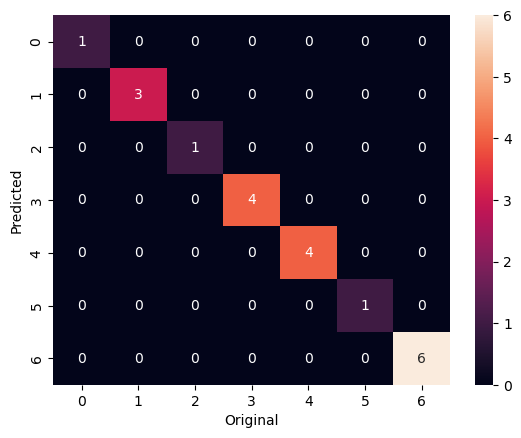

In [34]:
plt.figure()
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [35]:
pickle.dump(rf_model, open("rf.pkl", "wb"))